# 1.DATA PROCESSING


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [ ]:
# Load the dataset
leads = pd.read_csv('Leads.csv')

# Explore the dataset
print("Shape of the dataset:", leads.shape)
print("\nColumn names and data types:")
print(leads.dtypes)

Shape of the dataset: (9240, 37)

Column names and data types:
Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                   

In [ ]:
# Check for missing values
print("\nMissing values:")
print(leads.isnull().sum())


Missing values:
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper A

In [ ]:
# Handle missing values
missing_columns = ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country',
                   'Specialization', 'How did you hear about X Education', 'What is your current occupation',
                   'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile',
                   'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                   'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

In [ ]:
# Replace 'Select' with missing values in categorical columns
for col in missing_columns:
    leads[col] = leads[col].replace('Select', pd.NA)




In [ ]:
# Impute missing numerical values with median
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)


In [ ]:
# Impute missing categorical values with mode
for col in ['Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education',
            'What is your current occupation', 'What matters most to you in choosing a course', 'Tags',
            'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']:
    leads[col].fillna(leads[col].mode()[0], inplace=True)

In [ ]:
# Handle 'Select' values in categorical variables
select_columns = ['Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'City']
leads[select_columns] = leads[select_columns].replace('Select', pd.NA)

# Encode categorical variables
le = LabelEncoder()
for col in select_columns:
    leads[col] = leads[col].astype(str)  # Ensure all values are strings
    leads[col] = le.fit_transform(leads[col])

In [ ]:
# Split the data into training and testing sets
X = leads.drop('Converted', axis=1)
y = leads['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
print("\nShape of training set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of testing set (X_test, y_test):", X_test.shape, y_test.shape)


Shape of training set (X_train, y_train): (7392, 36) (7392,)
Shape of testing set (X_test, y_test): (1848, 36) (1848,)


# 2.EDA

In [ ]:
# Correlation analysis
numeric_columns = leads.select_dtypes(include=['int', 'float']).columns
correlation_with_target = leads[numeric_columns].corr()['Converted'].abs().sort_values(ascending=False)
top_three_variables = correlation_with_target[1:4]  # Excluding the target variable itsself

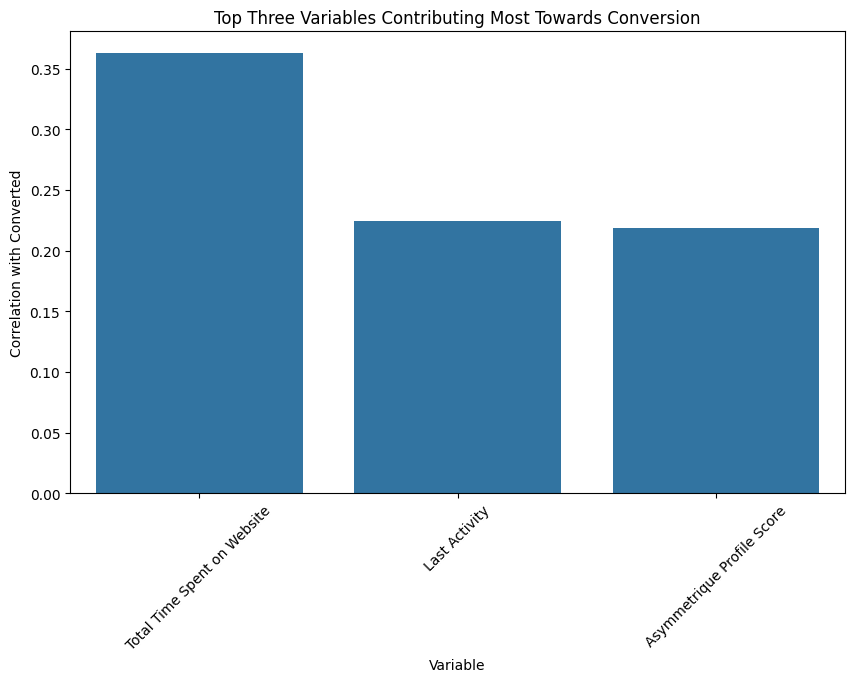

In [ ]:
# Visualize the top three variables contributing most towards conversion
plt.figure(figsize=(10, 6))
sns.barplot(x=top_three_variables.index, y=top_three_variables.values)
plt.title('Top Three Variables Contributing Most Towards Conversion')
plt.xlabel('Variable')
plt.ylabel('Correlation with Converted')
plt.xticks(rotation=45)
plt.show()

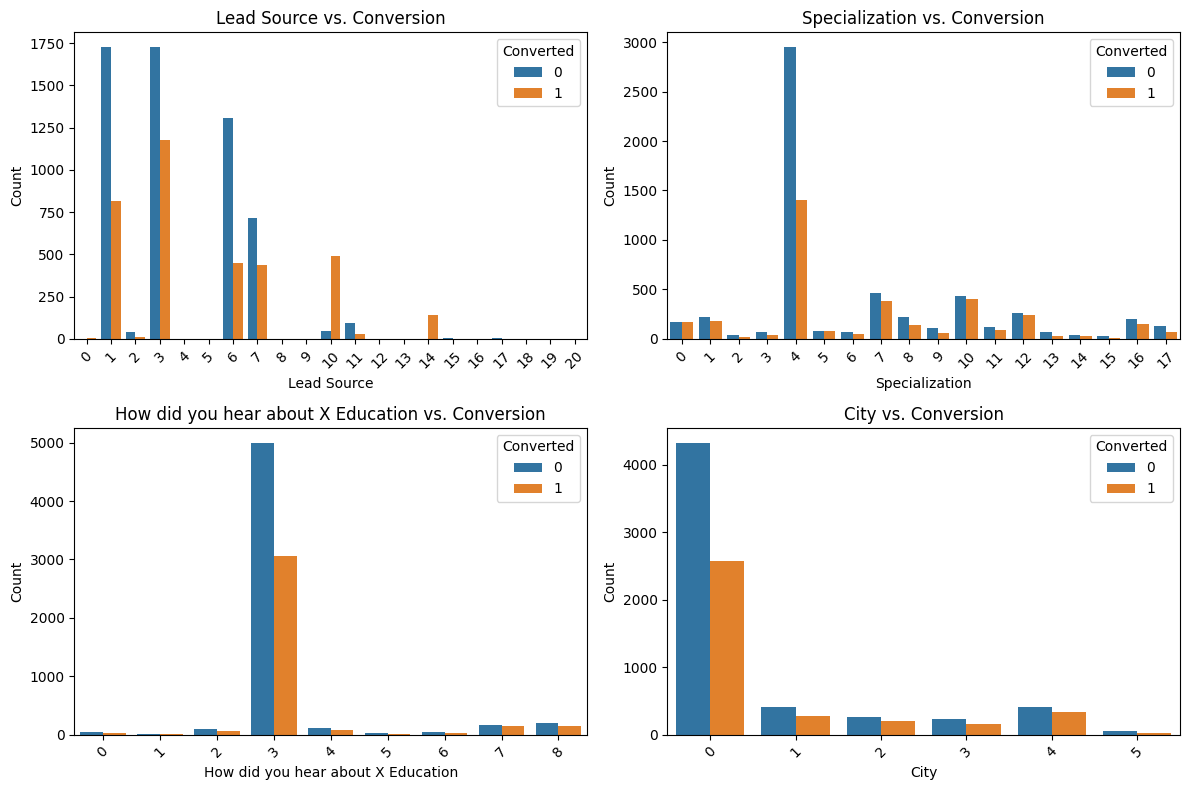

Top Three Categorical Variables Contributing Most to Conversion Probability:
    Lead Source  Conversion Rate  Specialization  Conversion Rate  \
20           20              0.0             NaN              NaN   
19           19              0.0             NaN              NaN   
18           18              0.0             NaN              NaN   

    How did you hear about X Education  Conversion Rate  City  \
20                                 NaN              NaN   NaN   
19                                 NaN              NaN   NaN   
18                                 NaN              NaN   NaN   

    Conversion Rate  Average Conversion Rate  
20              NaN                     10.0  
19              NaN                      9.5  
18              NaN                      9.0  


In [ ]:
# Visualize Categorical Variables
plt.figure(figsize=(12, 8))
categorical_variables = ['Lead Source', 'Specialization', 'How did you hear about X Education', 'City']  # Define relevant categorical variables
for i, col in enumerate(categorical_variables):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, hue='Converted', data=leads)
    plt.title(f'{col} vs. Conversion')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Converted', loc='upper right')

plt.tight_layout()
plt.show()

# Calculate Conversion Rates for each Category
conversion_rates = pd.DataFrame()
for col in categorical_variables:
    conversion_rate = leads.groupby(col)['Converted'].mean().reset_index()
    conversion_rate.columns = [col, 'Conversion Rate']
    conversion_rates = pd.concat([conversion_rates, conversion_rate], axis=1)

# Calculate Average Conversion Rate Across all Categorical Variables
conversion_rates['Average Conversion Rate'] = conversion_rates.mean(axis=1)

# Sort the DataFrame by Average Conversion Rate to Identify Top Categorical Variables
top_categorical_variables = conversion_rates.sort_values(by='Average Conversion Rate', ascending=False).head(3)

print("Top Three Categorical Variables Contributing Most to Conversion Probability:")
print(top_categorical_variables)

# 3.Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
relevant_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Source',
                     'Last Activity', 'Specialization', 'How did you hear about X Education', 'City']


In [ ]:
X_train_fe = X_train[relevant_features]
X_test_fe = X_test[relevant_features]

# Scale numerical features if needed
scaler = StandardScaler()
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train_fe[numerical_features] = scaler.fit_transform(X_train_fe[numerical_features])
X_test_fe[numerical_features] = scaler.transform(X_test_fe[numerical_features])

# Display the scaled features
print("Scaled training features:")
print(X_train_fe.head())

print("\nScaled testing features:")
print(X_test_fe.head())

Scaled training features:
      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6487    -0.298740                    -0.454165             -0.171422   
4759    -0.703744                    -0.889097             -1.092667   
4368    -0.096238                    -0.168456              0.289201   
1467     0.106264                     0.737805              0.749824   
5517    -0.298740                    -0.628866             -0.171422   

      Lead Source  Last Activity  Specialization  \
6487            7             12               0   
4759            6              9               4   
4368            3              5               4   
1467            3             12               8   
5517            1              1               1   

      How did you hear about X Education  City  
6487                                   7     4  
4759                                   3     0  
4368                                   3     0  
1467                            

<ipython-input-25-3d0242b79f63>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fe[numerical_features] = scaler.fit_transform(X_train_fe[numerical_features])
<ipython-input-25-3d0242b79f63>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_fe[numerical_features] = scaler.transform(X_test_fe[numerical_features])


# 4.Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_fe, y_train)

# Make predictions
y_pred_train = logreg.predict(X_train_fe)
y_pred_test = logreg.predict(X_test_fe)

# Evaluate the model
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("ROC-AUC Score:", roc_auc_score(y_train, logreg.predict_proba(X_train_fe)[:,1]))

print("\nTesting Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test_fe)[:,1]))


Training Set Metrics:
Accuracy: 0.7478354978354979
Precision: 0.7192660550458716
Recall: 0.5560283687943263
F1 Score: 0.6272000000000001
ROC-AUC Score: 0.8022646327010542

Testing Set Metrics:
Accuracy: 0.7380952380952381
Precision: 0.727433628318584
Recall: 0.5546558704453441
F1 Score: 0.6294027565084227
ROC-AUC Score: 0.8002315043393348


In [ ]:
# Assign lead scores using the trained model
lead_scores_train = logreg.predict_proba(X_train_fe)[:, 1]
lead_scores_test = logreg.predict_proba(X_test_fe)[:, 1]

# Display lead scores for the training and testing sets
print("Lead Scores for Training Set:")
print(lead_scores_train)

print("\nLead Scores for Testing Set:")
print(lead_scores_test)


Lead Scores for Training Set:
[0.64216705 0.31800836 0.16153547 ... 0.71407294 0.11430031 0.80909957]

Lead Scores for Testing Set:
[0.13691163 0.2525443  0.05318297 ... 0.09274626 0.19165823 0.32883518]


In [ ]:
from sklearn.metrics import confusion_matrix

# Define a function to adjust decision threshold based on sensitivity or specificity
def adjust_threshold(model, X, threshold=0.5, strategy='sensitivity'):
    # Predict probabilities
    y_prob = model.predict_proba(X)[:, 1]

    # Adjust threshold based on strategy
    if strategy == 'sensitivity':
        y_pred = (y_prob >= threshold).astype(int)
    elif strategy == 'specificity':
        y_pred = (y_prob >= threshold).astype(int)
    else:
        raise ValueError("Invalid strategy. Choose 'sensitivity' or 'specificity'.")

    return y_pred



In [ ]:
# Define a function to evaluate model performance with adjusted threshold
def evaluate_threshold(model, X, y, threshold=0.5, strategy='sensitivity'):
    # Adjust threshold
    y_pred = adjust_threshold(model, X, threshold, strategy)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return sensitivity, specificity


In [ ]:
# During Aggressive Lead Conversion Phase (Intern Hiring Period)
# Adjust threshold to maximize sensitivity
threshold_aggressive = 0.3  # Lower threshold to classify more leads as positive
sensitivity_aggressive, specificity_aggressive = evaluate_threshold(logreg, X_test_fe, y_test, threshold_aggressive, strategy='sensitivity')

print("Aggressive Lead Conversion Phase (Intern Hiring Period):")
print("Threshold:", threshold_aggressive)
print("Sensitivity:", sensitivity_aggressive)
print("Specificity:", specificity_aggressive)

Aggressive Lead Conversion Phase (Intern Hiring Period):
Threshold: 0.3
Sensitivity: 0.8178137651821862
Specificity: 0.6061427280939476


In [ ]:
# During Minimize Useless Phone Calls Phase (After Meeting Quarterly Targets)
# Adjust threshold to maximize specificity
threshold_minimize_calls = 0.7  # Higher threshold to classify only the most confident leads as positive
sensitivity_minimize_calls, specificity_minimize_calls = evaluate_threshold(logreg, X_test_fe, y_test, threshold_minimize_calls, strategy='specificity')

print("\nMinimize Useless Phone Calls Phase (After Meeting Quarterly Targets):")
print("Threshold:", threshold_minimize_calls)
print("Sensitivity:", sensitivity_minimize_calls)
print("Specificity:", specificity_minimize_calls)


Minimize Useless Phone Calls Phase (After Meeting Quarterly Targets):
Threshold: 0.7
Sensitivity: 0.291497975708502
Specificity: 0.9367660343270099
